In [6]:
# load libraries

# data manipulation
library(dplyr)
library(tidyverse)

# machine learning
library(caret)
library(MASS) # feature importance
library(PerformanceAnalytics) # evaluation
library(ModelMetrics)
library(pROC)

library(rpart) # decision tree
library(rpart.plot)
library(party) # random forest and svm
library(xgboost) # xgboost
library(e1071) # svm

# visualization
library(ggplot2)
library(GGally)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v readr   1.3.1
v tibble  3.1.1     v purrr   0.3.2
v tidyr   1.1.3     v stringr 1.4.0
v ggplot2 3.3.5     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x stringr::boundary() masks strucchange::boundary()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

Th

In [7]:
# import data
student_grades = read.csv('student_grades.csv')
head(student_grades)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0
GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,1


In [8]:
str(student_grades)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [9]:
# removing outliers in absences
student_grades <- student_grades %>%
subset(absences < 35)

In [10]:
str(student_grades)

'data.frame':	390 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [11]:
model_dataset <- student_grades

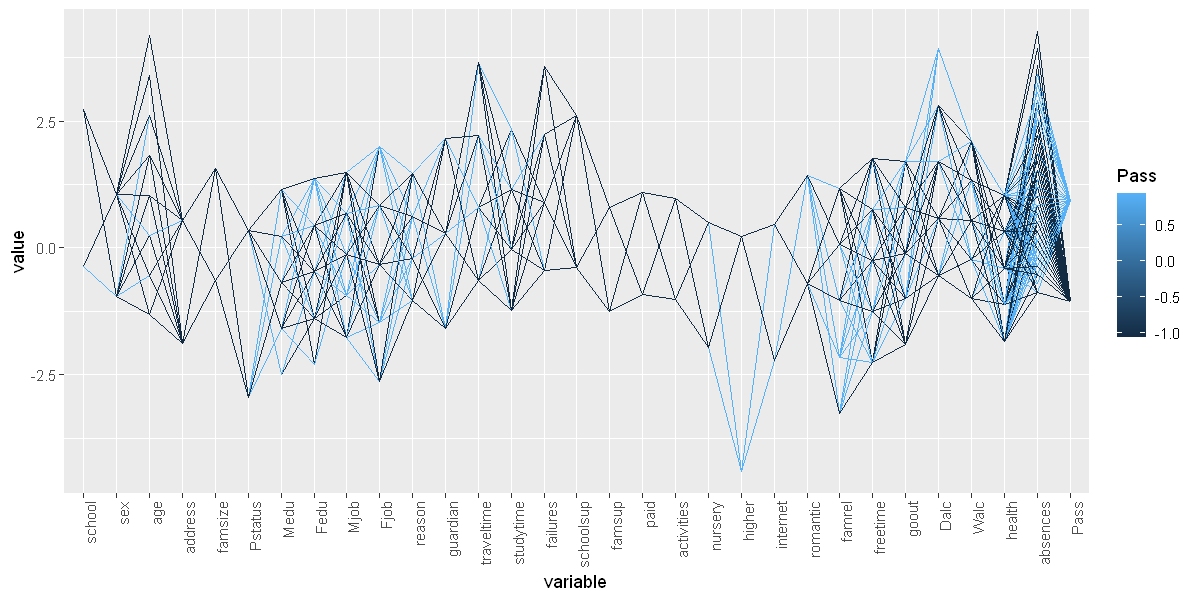

In [12]:
# check with parallel cordinate plots to check if previous assertions is confirmed
options(repr.plot.width=10, repr.plot.height=5)
ggparcoord(model_dataset, columns = c(1:31), groupColumn = 31) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [13]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex','school', 'address', 'famsize', 'Pstatus', 'Fjob', 'Mjob', 'reason',
                                                 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
                                                  'higher', 'internet', 'romantic')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,school.GP,school.MS,address.R,address.U,famsize.GT3,famsize.LE3,Pstatus.A,Pstatus.T,...,activities.no,activities.yes,nursery.no,nursery.yes,higher.no,higher.yes,internet.no,internet.yes,romantic.no,romantic.yes
1,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
2,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
3,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
4,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
5,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
6,0,1,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
8,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
9,0,1,1,0,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0
10,0,1,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0


In [14]:
drops <- c('sex','school', 'address', 'famsize', 'Pstatus', 'Fjob', 'Mjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]

model_dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
1,18,4,4,2,2,0,4,3,4,1,1,3,6,0
2,17,1,1,1,2,0,5,3,3,1,1,3,4,0
3,15,1,1,1,2,3,4,3,2,2,3,3,10,0
4,15,4,2,1,3,0,3,2,2,1,1,5,2,1
5,16,3,3,1,2,0,4,3,2,1,2,5,4,0
6,16,4,3,1,2,0,5,4,2,1,2,5,10,1
7,16,2,2,1,2,0,4,4,4,1,1,3,0,1
8,17,4,4,2,2,0,4,1,4,1,1,1,6,0
9,15,3,2,1,2,0,4,2,2,1,1,1,0,1
10,15,3,4,1,2,0,5,5,1,1,1,5,0,1


In [15]:
model_dataset$goout <- as.numeric(model_dataset$goout)
model_dataset$Walc <- as.numeric(model_dataset$Walc)
model_dataset$Dalc <- as.numeric(model_dataset$Dalc)
model_dataset$age <- as.numeric(model_dataset$age)
model_dataset$famrel <- as.numeric(model_dataset$famrel)
model_dataset$goout <- as.numeric(model_dataset$goout)
model_dataset$freetime <- as.numeric(model_dataset$freetime)
model_dataset$health <- as.numeric(model_dataset$health)
model_dataset$absences <- as.numeric(model_dataset$absences)
model_dataset$Pass <- as.numeric(model_dataset$Pass)

In [16]:
str(model_dataset)

'data.frame':	390 obs. of  14 variables:
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ health    : num  3 3 3 5 5 5 3 1 1 5 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [17]:
scale_dataset <- model_dataset[, -14] # scale columns from age to absences as they are not within 0 and 1
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass) # combine all datasets
model_dataset

,sex.F,sex.M,school.GP,school.MS,address.R,address.U,famsize.GT3,famsize.LE3,Pstatus.A,Pstatus.T,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,model_dataset$Pass
1,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.00000000,0.13333333,0.10000000,0.13333333,0.03333333,0.03333333,0.10000000,0.20000000,0
2,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.16666667,0.10000000,0.10000000,0.03333333,0.03333333,0.10000000,0.13333333,0
3,1,0,1,0,0,1,0,1,0,1,...,0.06666667,0.10000000,0.13333333,0.10000000,0.06666667,0.06666667,0.10000000,0.10000000,0.33333333,0
4,1,0,1,0,0,1,1,0,0,1,...,0.10000000,0.00000000,0.10000000,0.06666667,0.06666667,0.03333333,0.03333333,0.16666667,0.06666667,1
5,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.13333333,0.10000000,0.06666667,0.03333333,0.06666667,0.16666667,0.13333333,0
6,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.00000000,0.16666667,0.13333333,0.06666667,0.03333333,0.06666667,0.16666667,0.33333333,1
7,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.00000000,0.13333333,0.13333333,0.13333333,0.03333333,0.03333333,0.10000000,0.00000000,1
8,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.00000000,0.13333333,0.03333333,0.13333333,0.03333333,0.03333333,0.03333333,0.20000000,0
9,0,1,1,0,0,1,0,1,1,0,...,0.06666667,0.00000000,0.13333333,0.06666667,0.06666667,0.03333333,0.03333333,0.03333333,0.00000000,1
10,0,1,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.16666667,0.16666667,0.03333333,0.03333333,0.03333333,0.16666667,0.00000000,1


In [18]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [19]:
model_dataset

,sex.F,sex.M,school.GP,school.MS,address.R,address.U,famsize.GT3,famsize.LE3,Pstatus.A,Pstatus.T,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
1,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.00000000,0.13333333,0.10000000,0.13333333,0.03333333,0.03333333,0.10000000,0.20000000,0
2,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.16666667,0.10000000,0.10000000,0.03333333,0.03333333,0.10000000,0.13333333,0
3,1,0,1,0,0,1,0,1,0,1,...,0.06666667,0.10000000,0.13333333,0.10000000,0.06666667,0.06666667,0.10000000,0.10000000,0.33333333,0
4,1,0,1,0,0,1,1,0,0,1,...,0.10000000,0.00000000,0.10000000,0.06666667,0.06666667,0.03333333,0.03333333,0.16666667,0.06666667,1
5,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.13333333,0.10000000,0.06666667,0.03333333,0.06666667,0.16666667,0.13333333,0
6,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.00000000,0.16666667,0.13333333,0.06666667,0.03333333,0.06666667,0.16666667,0.33333333,1
7,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.00000000,0.13333333,0.13333333,0.13333333,0.03333333,0.03333333,0.10000000,0.00000000,1
8,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.00000000,0.13333333,0.03333333,0.13333333,0.03333333,0.03333333,0.03333333,0.20000000,0
9,0,1,1,0,0,1,0,1,1,0,...,0.06666667,0.00000000,0.13333333,0.06666667,0.06666667,0.03333333,0.03333333,0.03333333,0.00000000,1
10,0,1,1,0,0,1,1,0,0,1,...,0.06666667,0.00000000,0.16666667,0.16666667,0.03333333,0.03333333,0.03333333,0.16666667,0.00000000,1


In [20]:
str(model_dataset)

'data.frame':	390 obs. of  57 variables:
 $ sex.F            : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M            : num  0 0 0 0 0 1 1 0 1 1 ...
 $ school.GP        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.R        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.U        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ famsize.GT3      : num  1 1 0 1 1 0 0 1 0 1 ...
 $ famsize.LE3      : num  0 0 1 0 0 1 1 0 1 0 ...
 $ Pstatus.A        : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T        : num  0 1 1 1 1 1 1 0 0 1 ...
 $ Fjob.at_home     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.other       : num  0 1 1 0 1 1 1 0 1 1 ...
 $ Fjob.services    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjob.teacher     : num  1 0 0 0 0 0 0 1 0 0 ...
 $ Mjob.at_home     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other       : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services    : num  0 0 0 0 0 1 0 

In [21]:
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-58]
testset <- testset[-58]

In [22]:
dim(trainset)
dim(testset)

[1] 312  57

[1] 78 57

In [23]:
head(trainset)

,sex.F,sex.M,school.GP,school.MS,address.R,address.U,famsize.GT3,famsize.LE3,Pstatus.A,Pstatus.T,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
3,1,0,1,0,0,1,0,1,0,1,...,0.06666667,0.1,0.1333333,0.10000000,0.06666667,0.06666667,0.10000000,0.10000000,0.3333333,0
5,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.0,0.1333333,0.10000000,0.06666667,0.03333333,0.06666667,0.16666667,0.1333333,0
6,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.0,0.1666667,0.13333333,0.06666667,0.03333333,0.06666667,0.16666667,0.3333333,1
7,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.0,0.1333333,0.13333333,0.13333333,0.03333333,0.03333333,0.10000000,0.0000000,1
8,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.0,0.1333333,0.03333333,0.13333333,0.03333333,0.03333333,0.03333333,0.2000000,0
9,0,1,1,0,0,1,0,1,1,0,...,0.06666667,0.0,0.1333333,0.06666667,0.06666667,0.03333333,0.03333333,0.03333333,0.0000000,1


Model building

[1] 75.96154

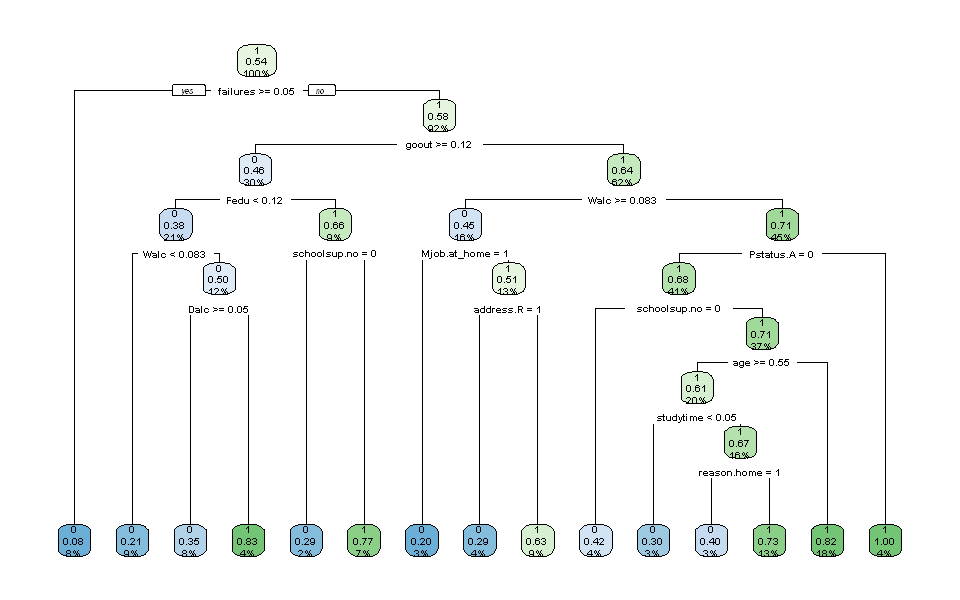

In [273]:
# fitting a decision tree model
library(rpart)
library(rpart.plot)

options(repr.plot.width=8, repr.plot.height=5)

dtreemodel <- rpart(Pass~., data = trainset, method = 'class')

# predict on trainset
tree_pred <- predict(dtreemodel, newdata = trainset, type = "class")
mean(tree_pred==trainset$Pass)*100

rpart.plot(dtreemodel, extra = 106)
tree_pred <- predict(dtreemodel, newdata = testset, type = "class")

In [274]:
conf_matrix <- table(actual = testset$Pass,predicted = tree_pred)
print(conf_matrix)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)

print(sensitivity)
print(specificity)
mean(tree_pred==testset$Pass)*100

      predicted
actual  0  1
     0 24 16
     1 11 27
[1] 0.6
[1] 0.7105263


[1] 65.38462

In [275]:
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(mcc)

[1] 0.31207


In [276]:
f1Score(actual=testset$Pass, predicted = tree_pred, cutoff = 0.5)

[1] 0.6551724

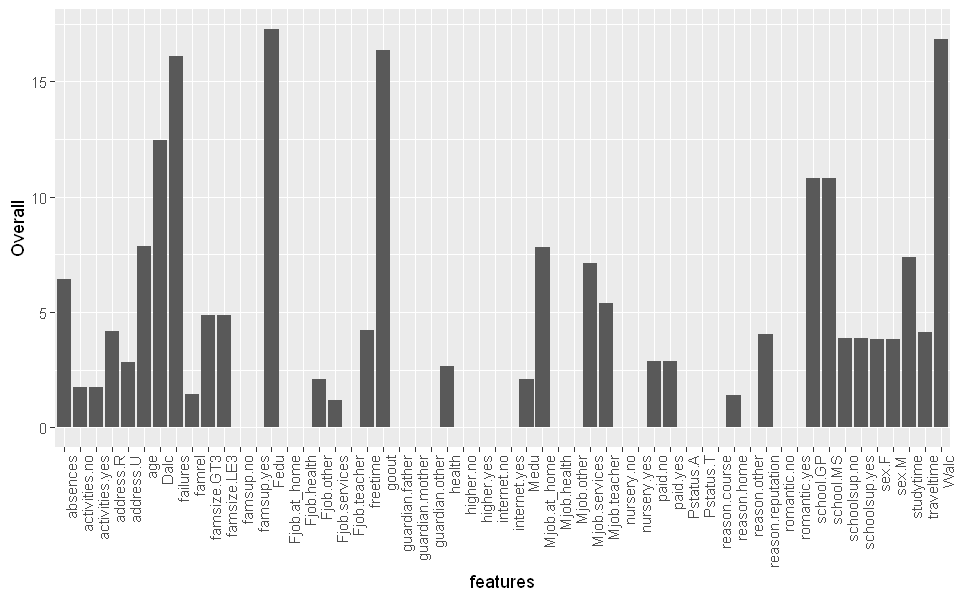

In [238]:
#get variable importance 
imp <- varImp(dtreemodel)
# attach rownames as a column
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')

#plot
ggplot(imp, aes(y = Overall, x = features))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

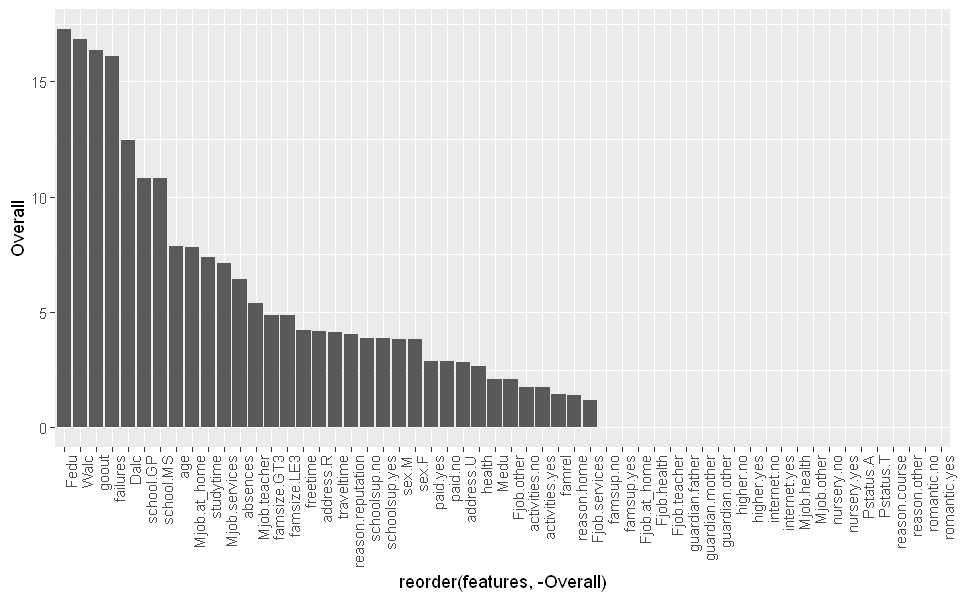

In [239]:
# use re-order on the x axis, using code found here: https://stackoverflow.com/questions/59461616/order-columns-in-ggplot
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [30]:
library(party)
forest_model<- cforest(Pass~., data = trainset, control = cforest_unbiased(mtry = 15, ntree = 30))

# predict on trainset
rf_prob <- predict(forest_model, newdata = trainset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)
mean(rf_pred==trainset$Pass)

rf_prob <- predict(forest_model, newdata = testset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)

[1] 0.7980769

In [31]:
conf_matrix <- table(actual = testset$Pass, predicted = rf_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(rf_pred==testset$Pass)
f1Score(actual=testset$Pass, predicted = rf_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 22 18
     1  9 29
[1] 0.55
[1] 0.7631579
[1] 0.3198566


[1] 0.6538462

[1] 0.6823529

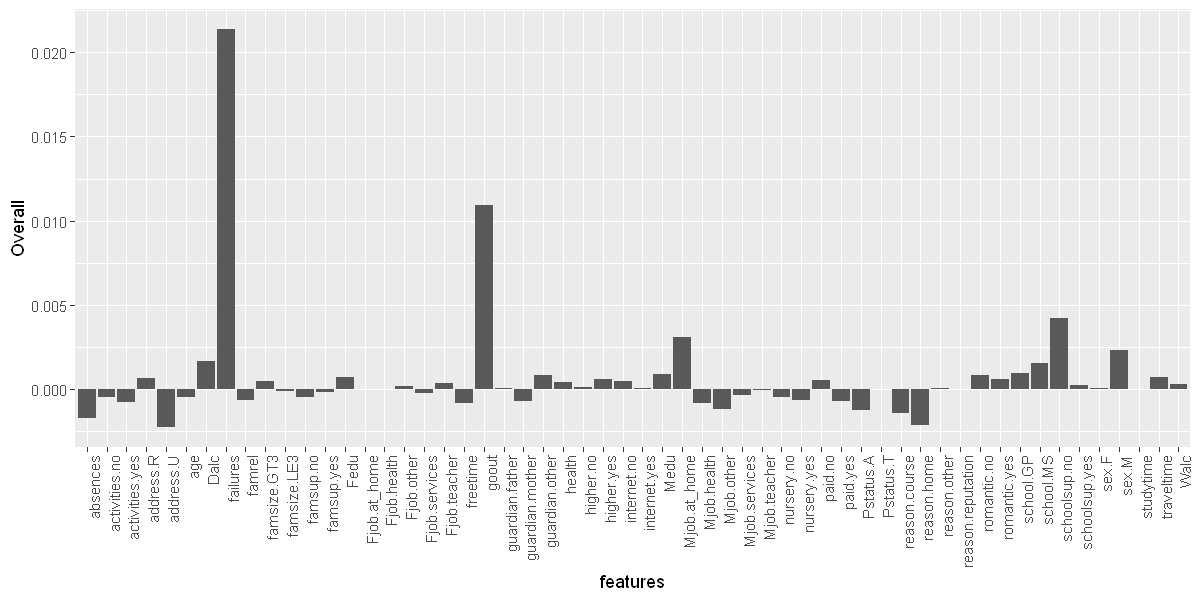

In [32]:
#get variable importance 
imp <- varImp(forest_model)
# attach rownames as a column
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')

#plot
ggplot(imp, aes(y = Overall, x = features))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

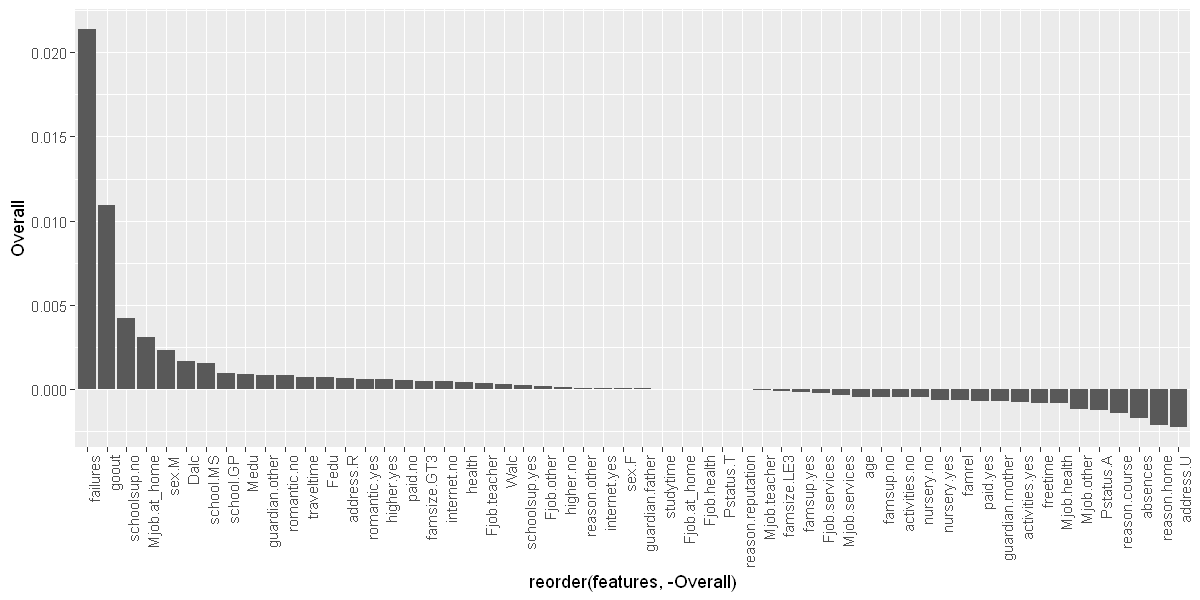

In [33]:
# use re-order on the x axis
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [40]:
library(xgboost)
train_matrix <- model.matrix(Pass~., trainset)
test_matrix <- model.matrix(Pass~., testset) 

train_labels <- trainset$Pass 
train_labels

[1] 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 [38] 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 [75] 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0
[112] 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0
[149] 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
[186] 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
[223] 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
[260] 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
[297] 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0

In [41]:
# fitting xgboost model
xgbmodel <- xgboost(data = train_matrix, label = train_labels,
eta = 0.2, nrounds = 100, max_depth = 10, objective = "binary:logistic", verbose = 0) 

# predict on train set
xgb_prob <- predict(xgbmodel, train_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 
mean(xgb_pred==trainset$Pass)

# predict on test set
xgb_prob <- predict(xgbmodel, test_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 


conf_matrix <- table(actual = testset$Pass, predicted = xgb_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(xgb_pred==testset$Pass)
f1Score(actual=testset$Pass, predicted = xgb_pred, cutoff = 0.5)

[12:25:23] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[1] 1

      predicted
actual  0  1
     0 24 16
     1  9 29
[1] 0.6
[1] 0.7631579
[1] 0.3674126


[1] 0.6794872

[1] 0.6987952

Feature,Gain,Cover,Frequency
failures,0.09109791,0.10005524,0.03043214
absences,0.07771278,0.09617252,0.10286062
Walc,0.07391393,0.04514887,0.05538649
goout,0.06001506,0.06555612,0.04382228
freetime,0.05523232,0.06781265,0.05842970
Fedu,0.05161217,0.05433429,0.05112599


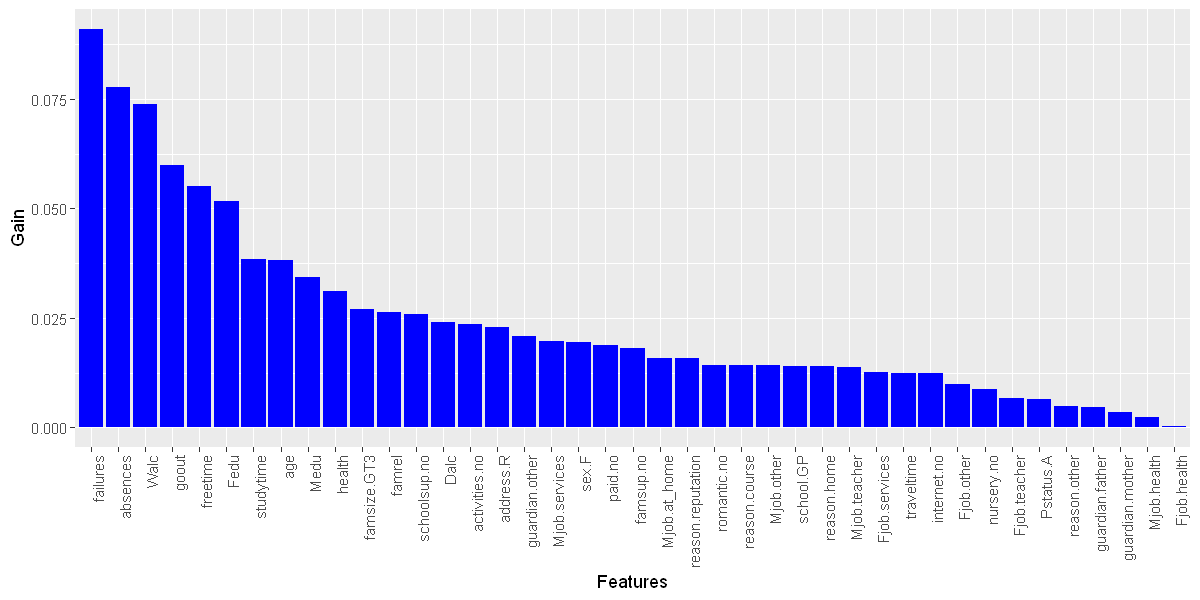

In [42]:
# get variable importance 
imp <- xgb.importance(model = xgbmodel)
imp <- as.data.frame(imp)

# inspect
head(imp)

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Gain, x = reorder(Feature, -Gain)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [43]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'linear')

print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-57])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-57])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  205



[1] 0.75

      predicted
actual  0  1
     0 22 18
     1  9 29
[1] 0.55
[1] 0.7631579
[1] 0.3198566


[1] 0.6538462

[1] 0.6551724

In [35]:
# get variable importance: 
# https://stackoverflow.com/questions/34781495/how-to-find-important-factors-in-support-vector-machine
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures             goout      Mjob.teacher              Fedu 
      0.827422180       0.467844683       0.401297271       0.281323698 
    Mjob.services     schoolsup.yes      schoolsup.no       Mjob.health 
      0.261980440       0.204928446       0.204928446       0.161795380 
              age         studytime      Fjob.teacher       reason.home 
      0.142119913       0.141492846       0.137578424       0.137542489 
             Medu             sex.M             sex.F      Mjob.at_home 
      0.132035218       0.128664886       0.128664886       0.127409477 
       nursery.no       nursery.yes              Walc          freetime 
      0.126831394       0.126831394       0.125676400       0.122915376 
             Dalc            health       Fjob.health            famrel 
      0.115866869       0.114650127       0.110294898       0.087746837 
        address.U         address.R      Fjob.at_home         Pstatus.T 
      0.084626926       0.084626926       0.080063117       0.072443661 
        Pstatus.A     activities.no    activities.yes       famsize.LE3 
      0.072443661       0.070090846       0.070090846       0.069683924 
      famsize.GT3    guardian.other        Mjob.other   guardian.father 
      0.069683924       0.068809922       0.067478560       0.065430863 
     reason.other         famsup.no        famsup.yes         school.GP 
      0.062248647       0.060471996       0.060471996       0.058691813 
        school.MS     reason.course       romantic.no      romantic.yes 
      0.058691813       0.055688519       0.054324429       0.054324429 
      internet.no      internet.yes     Fjob.services reason.reputation 
      0.051787230       0.051787230       0.040766506       0.034869092 
         absences        Fjob.other        traveltime        higher.yes 
      0.031661661       0.026097163       0.023378648       0.022673066 
        higher.no   guardian.mother           paid.no          paid.yes 
      0.022673066       0.020491886       0.007360123       0.007360123

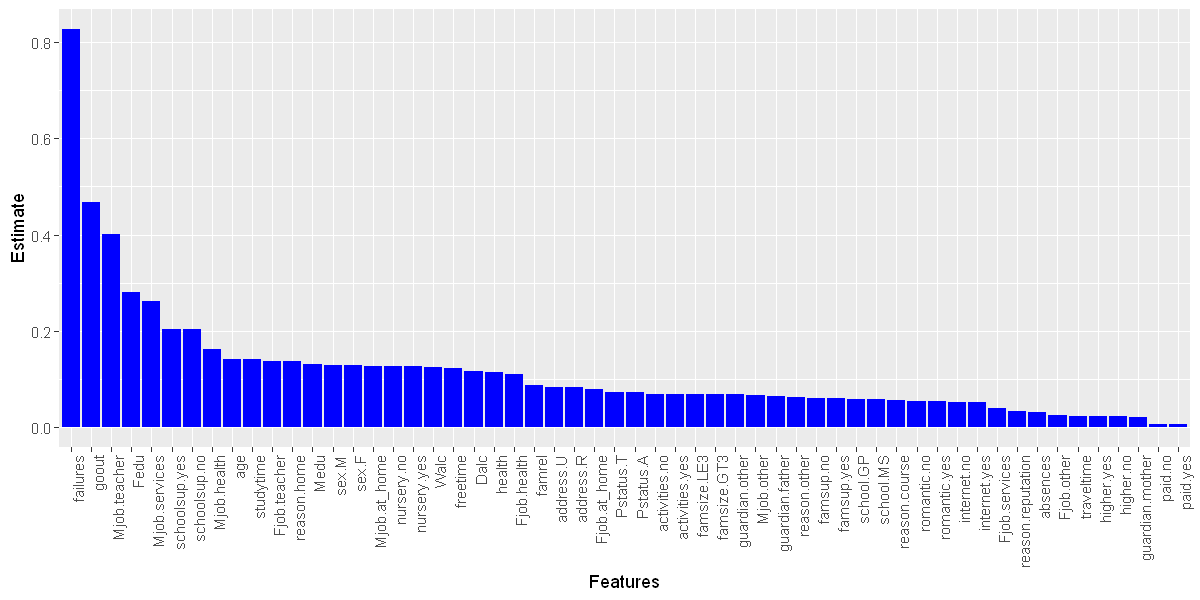

In [36]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [37]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'radial')

print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-57])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-57])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  284



[1] 0.9198718

      predicted
actual  0  1
     0 24 16
     1 11 27
[1] 0.6
[1] 0.7105263
[1] 0.31207


[1] 65.38462

[1] 0.6551724

In [38]:
# get variable importance: 
# https://stackoverflow.com/questions/34781495/how-to-find-important-factors-in-support-vector-machine
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures             goout      schoolsup.no     schoolsup.yes 
       42.7557956        27.8169215        20.4948424        20.4948424 
             Walc              Fedu      Fjob.teacher        nursery.no 
       16.0551562        14.0200754        13.8186526        13.3375442 
      nursery.yes       romantic.no      romantic.yes              Medu 
       13.3375442        13.2425500        13.2425500        13.2319119 
        studytime              Dalc       Mjob.health         Pstatus.A 
       11.3616216        10.6734241         9.2632116         8.8052992 
        Pstatus.T     Fjob.services       reason.home            famrel 
        8.8052992         8.5653707         8.2479961         8.0969871 
       traveltime        higher.yes         higher.no    guardian.other 
        7.6897869         7.6050220         7.6050220         7.3590076 
     Mjob.teacher     activities.no    activities.yes      Mjob.at_home 
        7.0009334         6.9843786         6.9843786         6.7619933 
         absences         address.U         address.R               age 
        6.6588662         5.0363450         5.0363450         4.7784834 
  guardian.father       famsize.GT3       famsize.LE3      reason.other 
        4.7054116         4.6386964         4.6386964         4.5434341 
    Mjob.services       Fjob.health      Fjob.at_home         school.GP 
        4.4052158         4.3706122         4.1186150         3.8546731 
        school.MS reason.reputation          freetime            health 
        3.8546731         3.8109571         3.1901760         2.7343521 
          paid.no          paid.yes             sex.F             sex.M 
        2.4753117         2.4753117         2.2196392         2.2196392 
    reason.course        Mjob.other         famsup.no        famsup.yes 
        1.2865957         0.8792079         0.8086962         0.8086962 
       Fjob.other      internet.yes       internet.no   guardian.mother 
        0.2547513         0.2435247         0.2435247         0.1069156

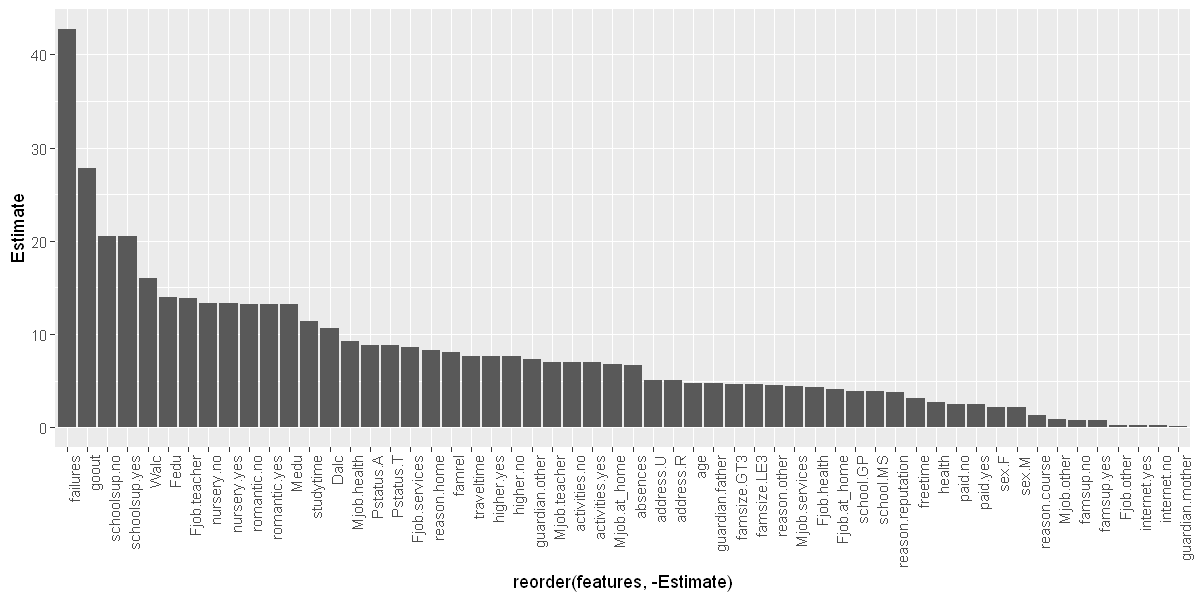

In [39]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [288]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'polynomial')

print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-57])
mean(y_pred==trainset$Pass)

# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-57])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  304



[1] 0.8525641

      predicted
actual  0  1
     0 11 29
     1  4 34
[1] 0.275
[1] 0.8947368
[1] 0.2152693


[1] 0.5769231

[1] 0.6551724

In [289]:
# get variable importance: 
# https://stackoverflow.com/questions/34781495/how-to-find-important-factors-in-support-vector-machine
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures      Mjob.at_home             goout         address.U 
       48.1330141        32.7889477        31.7501304        26.4604639 
        address.R      schoolsup.no     schoolsup.yes              Walc 
       26.4604639        26.1902761        26.1902761        21.6118388 
     internet.yes       internet.no     Mjob.services             sex.F 
       21.3780692        21.3780692        20.9092987        20.3629192 
            sex.M              Medu        traveltime              Dalc 
       20.3629192        19.1337738        18.4371576        17.6991462 
        school.GP         school.MS          absences      Mjob.teacher 
       17.2007978        17.2007978        16.0635893        15.9122413 
              age       reason.home       Mjob.health         famsup.no 
       15.4660677        14.2802076        13.7564516        13.5537091 
       famsup.yes            famrel              Fedu reason.reputation 
       13.5537091        13.1328839        12.6894908        10.1397413 
       Mjob.other    guardian.other      Fjob.teacher       Fjob.health 
        8.8167430         8.7783682         7.5006209         7.4873378 
  guardian.mother         higher.no        higher.yes     activities.no 
        6.9648173         6.7580022         6.7580022         6.5660547 
   activities.yes          paid.yes           paid.no       nursery.yes 
        6.5660547         6.5628702         6.5628702         5.9772930 
       nursery.no        Fjob.other       famsize.LE3       famsize.GT3 
        5.9772930         4.7090773         4.6800204         4.6800204 
     Fjob.at_home            health     Fjob.services     reason.course 
        4.4999770         4.4746099         4.1212111         3.4866484 
         freetime         studytime   guardian.father      reason.other 
        3.2092876         2.2901536         2.1856508         0.7809236 
        Pstatus.A         Pstatus.T      romantic.yes       romantic.no 
        0.6203458         0.6203458         0.5125701         0.5125701

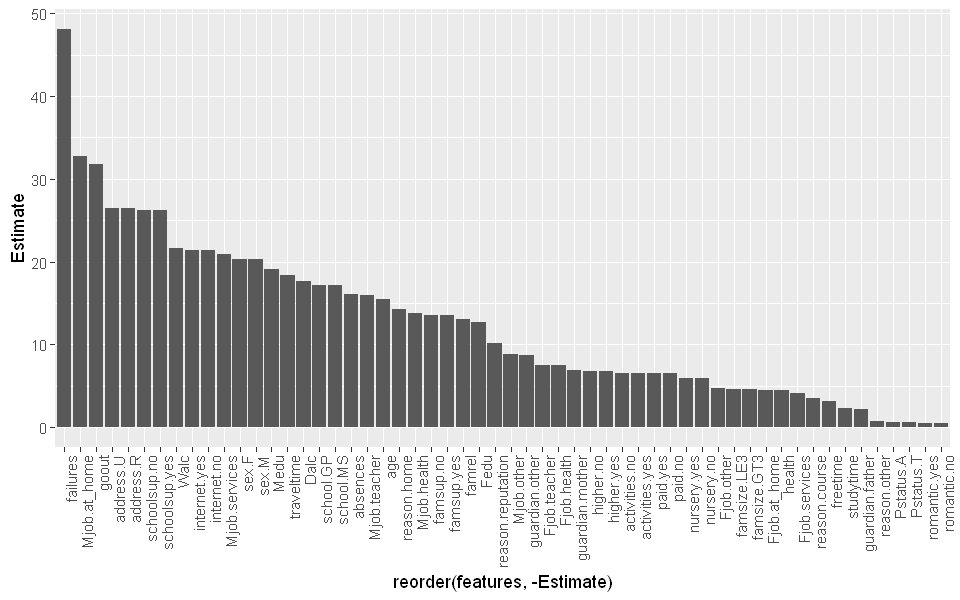

In [290]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [ ]:
# logistic regression - parametric model
# for comparisim

In [168]:
# convert label to factor to fit a logistic regression model
trainset$Pass <- as.factor(trainset$Pass)
testset$Pass <- as.factor(testset$Pass)
str(trainset)

head(trainset)

'data.frame':	311 obs. of  57 variables:
 $ sex.F            : num  1 1 0 0 1 0 0 1 1 0 ...
 $ sex.M            : num  0 0 1 1 0 1 1 0 0 1 ...
 $ school.GP        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.R        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.U        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ famsize.GT3      : num  0 1 0 0 1 0 1 1 1 1 ...
 $ famsize.LE3      : num  1 0 1 1 0 1 0 0 0 0 ...
 $ Pstatus.A        : num  0 0 0 0 1 1 0 0 0 0 ...
 $ Pstatus.T        : num  1 1 1 1 0 0 1 1 1 1 ...
 $ Fjob.at_home     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health      : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Fjob.other       : num  1 1 1 1 0 1 1 0 1 1 ...
 $ Fjob.services    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.teacher     : num  0 0 0 0 1 0 0 0 0 0 ...
 $ Mjob.at_home     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ Mjob.health      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Mjob.other       : num  0 1 0 1 1 0 1 0 0 0 ...
 $ Mjob.services    : num  0 0 1 0 0 1 0 

,sex.F,sex.M,school.GP,school.MS,address.R,address.U,famsize.GT3,famsize.LE3,Pstatus.A,Pstatus.T,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
3,1,0,1,0,0,1,0,1,0,1,...,0.06666667,0.1,0.1333333,0.10000000,0.06666667,0.06666667,0.10000000,0.10000000,0.3333333,0
5,1,0,1,0,0,1,1,0,0,1,...,0.06666667,0.0,0.1333333,0.10000000,0.06666667,0.03333333,0.06666667,0.16666667,0.1333333,0
6,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.0,0.1666667,0.13333333,0.06666667,0.03333333,0.06666667,0.16666667,0.3333333,1
7,0,1,1,0,0,1,0,1,0,1,...,0.06666667,0.0,0.1333333,0.13333333,0.13333333,0.03333333,0.03333333,0.10000000,0.0000000,1
8,1,0,1,0,0,1,1,0,1,0,...,0.06666667,0.0,0.1333333,0.03333333,0.13333333,0.03333333,0.03333333,0.03333333,0.2000000,0
9,0,1,1,0,0,1,0,1,1,0,...,0.06666667,0.0,0.1333333,0.06666667,0.06666667,0.03333333,0.03333333,0.03333333,0.0000000,1


In [169]:
# Fitting Logistic Regression to the Training set

test_labels <- testset$Pass
classifier = glm(formula = Pass ~ .,
                 family = binomial,
                 data = trainset)

# predict train set
prob_pred = predict(classifier, type = 'response', newdata = trainset[, -57])
y_pred = ifelse(prob_pred > 0.5, 1, 0)
mean(y_pred==trainset$Pass)

# predict test set
prob_pred = predict(classifier, type = 'response', newdata = testset[, -57])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.7363344

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [170]:
conf_matrix <- table(test_labels, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)

           predicted
test_labels  0  1
          0 18 23
          1  7 30
[1] 0.4390244
[1] 0.8108108
[1] 0.2673243


[1] 0.6153846

[1] 0.71875

In [88]:
summary(classifier)


Call:
glm(formula = Pass ~ ., family = binomial, data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3745  -0.8856   0.3925   0.8067   2.1928  

Coefficients: (17 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.33788    3.37825   0.692  0.48891    
sex.F              -0.56304    0.33962  -1.658  0.09735 .  
sex.M                    NA         NA      NA       NA    
school.GP           0.15406    0.53664   0.287  0.77405    
school.MS                NA         NA      NA       NA    
address.R          -0.34658    0.40180  -0.863  0.38838    
address.U                NA         NA      NA       NA    
famsize.GT3        -0.19534    0.32506  -0.601  0.54789    
famsize.LE3              NA         NA      NA       NA    
Pstatus.A           0.59006    0.53263   1.108  0.26793    
Pstatus.T                NA         NA      NA       NA    
Fjob.at_home       -0.47189    0.88906  -0

In [87]:
summary(classifier)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.33788018,3.3782537,0.69203807,4.889134e-01
sex.F,-0.56304310,0.3396208,-1.65785791,9.734615e-02
school.GP,0.15405880,0.5366428,0.28707885,7.740519e-01
address.R,-0.34658119,0.4018017,-0.86256771,3.883752e-01
famsize.GT3,-0.19533595,0.3250595,-0.60092373,5.478908e-01
Pstatus.A,0.59006424,0.5326283,1.10783497,2.679331e-01
Fjob.at_home,-0.47188701,0.8890550,-0.53077368,5.955756e-01
Fjob.health,-1.41309059,0.9381844,-1.50619708,1.320166e-01
Fjob.other,-0.69395702,0.6654119,-1.04289836,2.969954e-01
Fjob.services,-0.70835509,0.6708059,-1.05597623,2.909791e-01


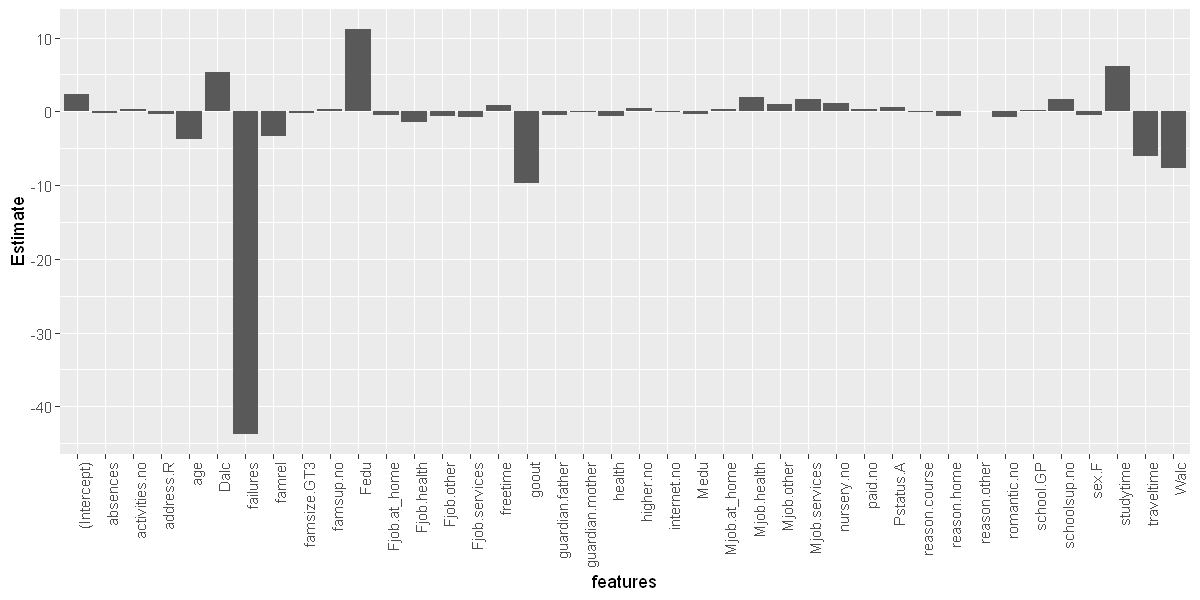

In [110]:
#get variable importance 
imp <- summary(classifier)$coefficients
# attach rownames as a column
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe before copying rownames
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Estimate', 'Std_Error', 'z_value', 'p_value','features')

#plot
ggplot(imp, aes(y = Estimate, x = features))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

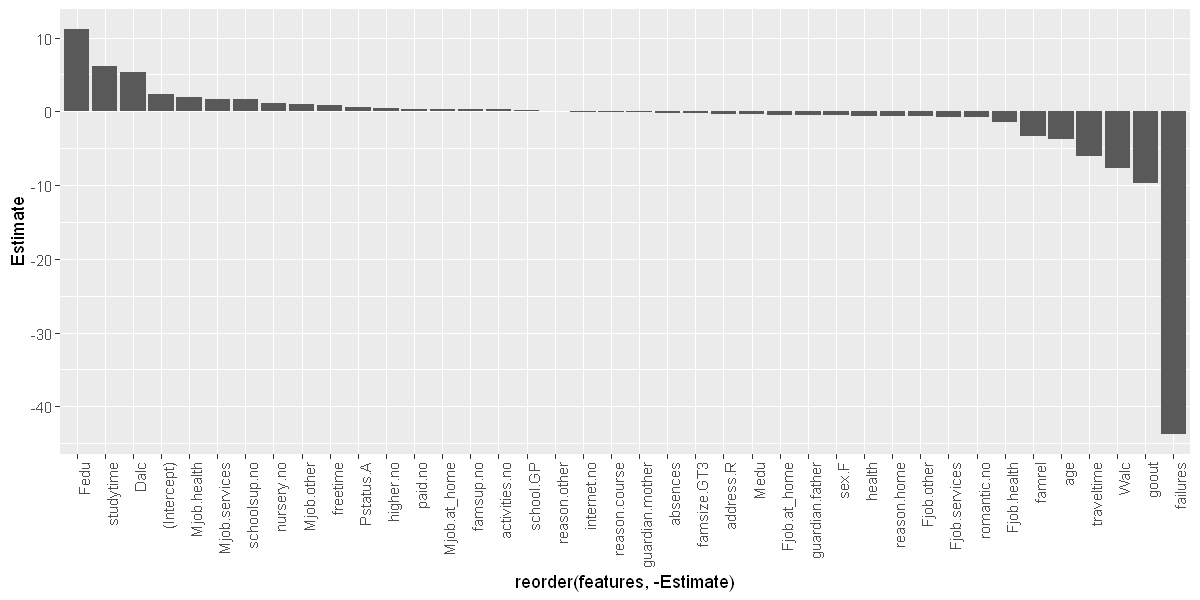

In [111]:
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 